# Modularized NN Model for XOR gate

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Learning XOR Logic Gate

In [3]:
# data for XOR gate
X = np.array([[0,0,1,1], [0,1,0,1]], dtype=np.float32)
y = np.array([0,1,1,0], dtype=np.float32)

In [4]:
X.shape

(2, 4)

Building NN model

epoch:    0 	loss: 0.36601 	 accuracy: 0.5
epoch:   10 	loss: 0.31282 	 accuracy: 0.5
epoch:   20 	loss: 0.25691 	 accuracy: 0.75
epoch:   30 	loss: 0.21082 	 accuracy: 0.75
epoch:   40 	loss: 0.18708 	 accuracy: 0.75
epoch:   50 	loss: 0.13555 	 accuracy: 0.75
epoch:   60 	loss: 0.01032 	 accuracy: 1.0
epoch:   70 	loss: 0.00707 	 accuracy: 1.0
epoch:   80 	loss: 0.00533 	 accuracy: 1.0
epoch:   90 	loss: 0.00423 	 accuracy: 1.0

final
epoch:   99 	loss: 0.00355
y_pred = [[0.04220021 0.93504685 0.9465408  0.07306926]]
2


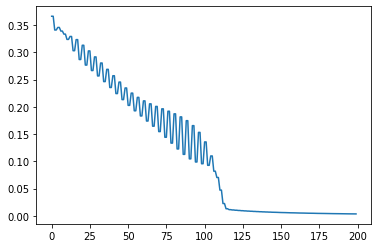

In [17]:
# hyperparameters
lr = 10   # learning rate
arch = [10] # architecture
epochs = 100
loss = []
w_list = []

model = Model(arch)

# train model
for epoch in range(epochs):

    with tf.GradientTape() as g:
        ls, y_pred = model.loss(model(X), y)

    grads = g.gradient(ls, model.Variables)
    
    w_list.append(model.Variables[0][0][0])
    loss.append(ls)
    
    model.Variables = [v.assign_sub(delta * lr) for v, delta in zip(model.Variables, grads)]
    
    if epoch%10 == 0:
        print(f"epoch: {epoch:4d} \tloss: {ls:.5f} \t accuracy: {model.accuracy(y_pred, y)}")
#         print(f"y_pred = {y_pred} \tepoch: {epoch:4d} \tloss: {ls:.5f}")
       
    loss.append(ls)
    
print('\nfinal')
print(f"epoch: {epoch:4d} \tloss: {ls:.5f}")
print(f"y_pred = {y_pred}")
print(len(model.weights))
plt.plot(loss)

In [16]:
class Model:
    def __init__(self, *arg):
        self.arch = arg[0]
        self.built = False # the model is called for first time
        
    
    """
    Init weight and biases for various layers of nodes
    args = no. of feature of X (in this case, 2)"""
    def build(self, input_len):
        print('Building NN model\n')
        w_init = tf.random.normal # alias for tf.random.normal
        b_init = tf.zeros         # alias for tf.zeros
        
        self.weights = []
        self.biases = []
        
        for dim in self.arch:
            self.weights.append(tf.Variable(
                w_init(shape=(dim, input_len))))
            self.biases.append(tf.Variable(
                b_init(shape=(dim, 1)))) ## 1 coz not a matrix
            
            input_len = dim
        
        # init wt and bias for final output layer [1 neuron]
        self.weights.append(tf.Variable(
            w_init(shape=(1, dim))))
        self.biases.append(tf.Variable(
            b_init(shape=(1,)))) # 1 coz not a matrix
        
        self.Variables = self.weights + self.biases
        
        ## change w_init to b_init for biases later
        
    """feedfwd process
    recieve X.shape = (2,4) -> 2 features, 4 samples
    return  y.shape = (1,4) -> 1 output, 4 samples
    """
    def __call__(self, X):
        if self.built == False:
            self.build(X.shape[0])
            self.built = True
        
        for w,b in zip(self.weights, self.biases):
            z = tf.matmul(w, X) + b
            a = tf.math.sigmoid(z)
#             a = tf.math.maximum(0,z)
            X = a
        
        return a
        
    
    def loss(self, y_pred, y_true):
        return tf.reduce_sum((y_pred - y_true)**2) / 4, y_pred 
    
    def accuracy(self, y_pred, y_true):
        # round off the prediction probabilities 
        new = tf.round(y_pred)
        # tf.equal() gives bool list for corresponding elements 
        # np.mean() calculates the mean of the bool list and gives accuracy in range 0-1
        return np.mean(tf.equal(y_true, new))
    
    def predict(self, X_input):
        output = model(X_input)
        new = tf.round(output)
        tf.print(new)

In [9]:
for i in range(2):
    for j in range(2):
        print(i,j, end='  ')
        model.predict([[i], [j]])
        

0 0  [[0]]
0 1  [[1]]
1 0  [[1]]
1 1  [[0]]


Check nn_model_2.ipynb for shapes of weight, bias and input matrices for each layers </br>
Also, check NN diary for rough notes

In [178]:
list1 = ['x', 'y']
list1

['x', 'y']

In [181]:
list2 = [x, y]
list2

[<tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.0>]

In [190]:
x = tf.constant(2.)
y = tf.constant(7.)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    z = x**3 + y**4
dz_dx = g.gradient(z,x)
dz_dy = g.gradient(z,y)
tf.print(dz_dx)
tf.print(dz_dy)

12
None


In [169]:
j = 0
for i in model.Variable:
    if j == 0:
        print(i)
    j+=1

<tf.Variable 'Variable:0' shape=(10, 2) dtype=float32, numpy=
array([[ 0.672416  ,  0.11648333],
       [ 0.3264731 , -1.103052  ],
       [-0.29433477,  0.6968723 ],
       [ 0.7540589 ,  0.18316284],
       [-0.5749502 ,  0.10074586],
       [ 0.6499909 , -1.1503396 ],
       [-0.5097219 ,  0.8965029 ],
       [-1.0278198 ,  0.05046963],
       [ 0.43077514,  0.59710574],
       [ 2.0213406 , -0.10093223]], dtype=float32)>


In [199]:
a = np.array([1,2,3])
b = tf.constant(5)
type(b)

tensorflow.python.framework.ops.EagerTensor

In [256]:
tf.print(tf.round(0.50))

0


In [261]:
np.round(2.5)

2.0

In [277]:
print(tf.equal([1,2,3,4,5], [3,2,3,4,1]))

tf.Tensor([False  True  True  True False], shape=(5,), dtype=bool)


In [6]:
def func(x):
    print(x)

In [8]:
func([10,20,30])

[10, 20, 30]


In [10]:
tf.math.maximum(0,-5)

<tf.Tensor: shape=(), dtype=int32, numpy=0>